![SPARK Banner](https://i.imgur.com/3vCmTns.png)

# SPARK | Day 3 | July 14th, 2021

The agenda for today:

1. Visualizing Data: An Introduction
2. Seaborn
3. Peer Programming: Graphing Your Data
4. Good Documentation & Comments
5. Peer Programming: Comment Your Code

# Visualizing Data: An Introduction

In data sciences, one of the most effective ways to get insights on data is to visualize it. Data can be visualized using a variety of plots, which make the data easy to understand and to convey general trends and key elements in the data.


In python, there are a variety of plotting libraries. Matplotlib, is the core plotting and visualization library that comes pre-packaged with python. It is extremely flexable, but is known for “tries to make easy things easy and hard things possible”.

Seaborn, which is built on top of Matplotlib, is the library that we will be learning this week. It works well with pandas DataFrames and makes a well-defined set of complex graphs easy to do. 



# Seaborn

### Load Data

In [1]:
# Import Pandas and Seaborn

import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Import car data

df_cars = pd.read_csv("https://raw.githubusercontent.com/AutismResearchCentre/Spark_Datasets/master/Cars.csv")

In [3]:
# Look at car data

df_cars.head(10)

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970,USA
5,ford galaxie 500,15.0,8,429.0,198.0,4341,10.0,1970,USA
6,chevrolet impala,14.0,8,454.0,220.0,4354,9.0,1970,USA
7,plymouth fury iii,14.0,8,440.0,215.0,4312,8.5,1970,USA
8,pontiac catalina,14.0,8,455.0,225.0,4425,10.0,1970,USA
9,amc ambassador dpl,15.0,8,390.0,190.0,3850,8.5,1970,USA


In [8]:
df_cars['Origin'].value_counts()

USA       254
Japan      79
Europe     73
Name: Origin, dtype: int64

### Common Seaborn Parameters

Seaborn is built to be compatible with DataFrames. So pass the DataFrame as a parameter as well as the column names that we hope to plot.

Below are common seaborn paramters:



*   `data` - name of the dataframe
*   `x` - column name corresponding to the x-axis
*   `y` - column name corresponding to the y-axis
*   `hue` - column name corresponding to the colour of the plot shapes
*   `estimator` - function to estimate data (e.g., `np.mean`, `np.std`, `np.max`, `np.min`)





Take note of the column names in the DataFrame called `df_cars`. We will be using the column names to plot specific information about the cars.

### Bar Plots (`sns.barplot`)

Bar plots are used for **univariate or categorical data**. They can be used to visualize the count of values of each category or to visualize some sort of aggregate value (e.g., mean, standard deviation, min, max) of catergorical data.

`sns.barplot` is the name of the function that creates bar plots. More documentation about it can be found at **https://seaborn.pydata.org/generated/seaborn.barplot.html**

#### Plotting a bar graph of weight of cars by different places of origin

In the dataset, cars come from one of three places of origin (i.e., the USA, Japan and Europe)

In [9]:
df_cars['Origin'].value_counts()

USA       254
Japan      79
Europe     73
Name: Origin, dtype: int64

We can use the `groupby` function along with `.mean()` to get information about the average weight of cars by country.

In [10]:
df_cars.groupby('Origin').mean()['Weight_in_lbs'] # group origin by weight

Origin
Europe    2431.493151
Japan     2221.227848
USA       3372.700787
Name: Weight_in_lbs, dtype: float64

We can also plot this data in using the `sns.barplot` function. 

* We set `data=df_cars` to give Seaborn information about the DataFrame we are using

* On our x-axis, we want to have the different places of origin, so we set `x="Origin"`. Note that we want the name of the columns, which is a string type, so the column name needs to be in quotations.

* On our y-axis, we want to plot the weight of the cars in pounds, so we set `y="Weight_in_lbs"`.

* We want the bars to be different colours, so we set `hue="Origin"`

* Finally, we want to plot the mean or average weight of the cars, so we set our `estimator=np.mean`





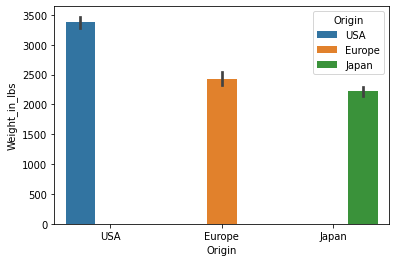

In [12]:
sns.barplot(
    data=df_cars,
    x='Origin',
    y='Weight_in_lbs',
    hue='Origin',
    estimator=np.mean,
)

If we want to look at the minimum car weight, we can simply change the estimator to `estimator=np.min`. Notice the the lightest car manufactured by region is about the same weight.

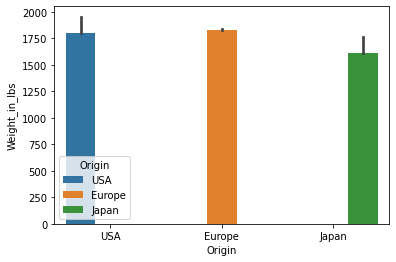

In [ ]:
sns.barplot(
    data=df_cars,
    x='Origin',
    y='Weight_in_lbs',
    hue='Origin',
    estimator=np.min,
)

We can also change hue to an entirely different column to get more informaiton about our data.

For example if we change, `hue="Cylinders"`. We learn that the USA tends to make higher cylinder cars (i.e., cars with 6 or 8 cylinders), and these high cylinder cars usually weight more.

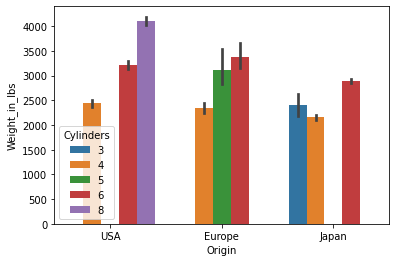

In [ ]:
sns.barplot(
    data=df_cars,
    x='Origin',
    y='Weight_in_lbs',
    hue='Cylinders',
    estimator=np.mean,
)

#### Exercise 1: Plot a bar graph that shows the efficiency (in miles per gallon) of cars from different places of origin over time (year).

* Hint: Plot`"Year"` on the x-axis, `"Miles_per_Gallon"` on the y-axis, and `"Origin"` as the hue.
* What is the general trend you notice?


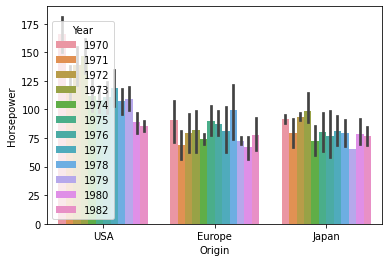

In [14]:
### TO-DO: Plot the efficiency of cars over time by place of origin

sns.barplot(
    data=df_cars,
    x='Origin',
    y='Horsepower',
    hue='Year',
    estimator=np.mean,
)

### What are the general trends of the data?

In [ ]:
sns.barplot(
    data=df_cars,
    x='Year',
    y='Miles_per_Gallon',
    hue='Origin',
    estimator=np.mean,
)

## Scatter Plots (`sns.scatterplot`)

Scatter plots are used for **bivariate data (continous, continuous)**. There are ideal for understanding the relationship between two continuous variables, and help to visualize the degree of correlation between two variables. 

`sns.scatterplot` is the name of the function that creates scatter plots. More documentation about it can be found at **https://seaborn.pydata.org/generated/seaborn.scatterplot.html**

### Plotting a scatter plot of horse power vs. mileage. 

We expect to see a relationship between horsepower and miles per gallon. To visualize this relationship we can a scatterplot. Where we plot `Horsepower` on the x-axis, and `Miles_per_Gallon` on the y-axis.

We can see that higher horsepower is correlated to lower fuel-efficiency as measured by miles per gallon.

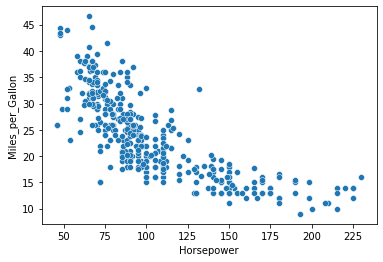

In [ ]:
sns.scatterplot(
    data=df_cars,
    x='Horsepower',
    y='Miles_per_Gallon',
)


We can also add further information to the graph by adding a `hue`. For example, we can set `hue="Origin"`, to see how powerful and fuell efficient cars are around the world.

When we do that, we notice how cars in the USA tend to have extremely high horsepower, but low fuel efficiency. 

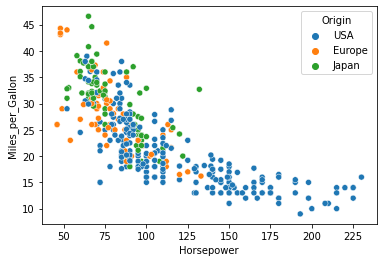

In [ ]:
sns.scatterplot(
    data=df_cars,
    x='Horsepower',
    y='Miles_per_Gallon',
    hue="Origin",
)


Scatter plots also have a size parameter that we can use to encode more information in the plots. 

For example, if we encode `size="Cylinder"`, we can get a sense of how powerful and fuel efficient cars are based on cylinder size. We can appreciate how cars with more cylinders have more horsepower but get less miles per gallon.

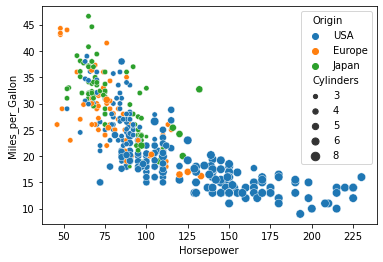

In [ ]:
sns.scatterplot(
    data=df_cars,
    x='Horsepower',
    y='Miles_per_Gallon',
    hue="Origin",
    size='Cylinders'
)


### Exercise 2: Plot a scatter plot of your choice using the car data.

Pick two continuous variables to plot on the x- and y-axis. Be sure to add `hue` and `size` parameters of your choice too. 

In [15]:
df_cars.columns

Index(['Name', 'Miles_per_Gallon', 'Cylinders', 'Displacement', 'Horsepower',
       'Weight_in_lbs', 'Acceleration', 'Year', 'Origin'],
      dtype='object')

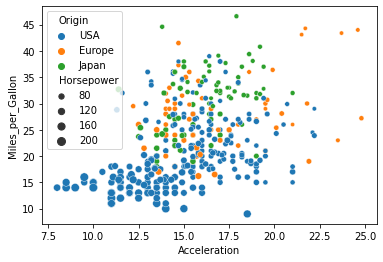

In [17]:
### TO-DO: Create a scatter plot with df_cars

sns.scatterplot(
    data=df_cars,
    x='Acceleration',
    y='Miles_per_Gallon',
    hue="Origin",
    size='Horsepower'
)





## Distribution Plots


Sometimes we want to see how are data are distributed or spread out. This is where distribution plots come in handy for **univariate, continuous** data.

There are several ways we can visualize the distribution of data, but here are four popular plots: 

1. **box plots**: used to determine the variation in your continuous data
2. **histograms**: used to visualize the frequency of our continuous variable within each predefined bins
3.  **density plots**: a version of histogram smoothened by Kernel density estimation.
4. **violin plots**: combined version of a box plot and density plot


In [ ]:
###

### Box Plots (`sns.boxplot`)

Box plots are used to determine the variation in continuous data. In particular, they are often used to determine outliers.

A box plot is comprised of **(1) the box** and **(2) the whiskers**.

The **box part** of the plot is made up of three parts:

1. **Quartile 1 (Q1):** 25th percentile
2. **Quartile 2 (Q2)/Median:** The median or 50th percentile
3. **Quartile 3 (Q3):** 75th percentile

The **Interquantile Range (IQR)** is the difference between Q3 and Q1. It gives us a sense of the spread of the data.


The **whisker part** of the plot represents what is consider the borders (min and max) for outliers.

1. **min:** any values greater than this range are considered outliers
  - min = Q3 + 1.5*IQR
2. **max:** any values less than this range are considered outliers
  - max = Q1 + 1.5*IQR


![Box Plot](https://i.imgur.com/RcdP4kr.png)


`sns.boxplot` is the name of the function that creates these types of plots. More documentation about it can be found at https://seaborn.pydata.org/generated/seaborn.boxplot.html

We can plot the boxplot for miles per gallon by origin. We can see that each place of origin has some outliers (i.e., the diamond shape).

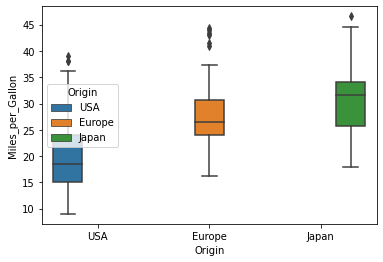

In [ ]:
sns.boxplot(
    data=df_cars,
    x='Origin',
    y='Miles_per_Gallon',
    hue="Origin",
)


### Histograms (`sns.histplot`)

Histograms are used to visualize the frequency of continuous variables in what are known as **bins**.


**Bins** 

A bin is an interval into which the dataset is divided. For example, if we have a range of values from 1-100, we can create bins of intervals of 20. So, we could have the first bin contain values from 1-20, the second 21-40, third 41-60, and so on until 100. This gives us an idea of how many of the values in a given data set fall within a certain range of values, i.e., the distribution of the data. Bins are usually equal in size, but do not necessarily have to be.



![histogram bins](https://i.imgur.com/hDfK8vE.png)




**Histogram Distributions**

Histograms give us greater insight into how our data are distributed. 

Here are some common distributions. Note that the peaks are revered to local maxima. 


![histogram distributions](https://i.imgur.com/ypLJkKJ.png)


`sns.histplot` is the name of the function that creates these types of plots. More documentation about it can be found at https://seaborn.pydata.org/generated/seaborn.histplot.html





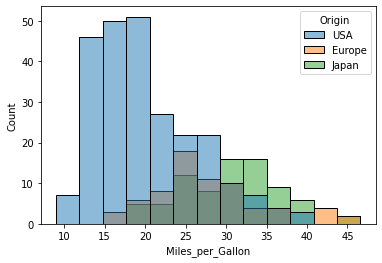

In [ ]:
sns.histplot(
    data=df_cars,
    x='Miles_per_Gallon',
    hue="Origin",
)


### Density Plots (`sns.kdeplot`)

Density plots are similar to histograms but they use a kernal density estimate (usually gaussain) to smooth the plot.


`sns.kdeplot` is the name of the function that creates these types of plots. More documentation about it can be found at https://seaborn.pydata.org/generated/seaborn.kdeplot.html




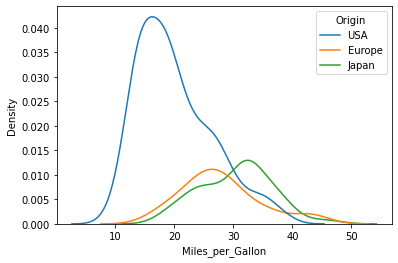

In [ ]:
sns.kdeplot(
    data=df_cars,
    x='Miles_per_Gallon',
    hue="Origin",
)


In [ ]:
###

### Violin Plots (`sns.violinplot`)

Violin plots are like if box plots and density plots had a baby. There great for showing distributions across different levels of categorical variables (e.g., like place of origin).


The middle bar of the box plot gives similar information as the boxplot. Whereas the "violin" portion of the box plot encodes information about distribution and skewness. 

![](https://i.imgur.com/PcGY1TK.png)

`sns.violinplot` is the name of the function that creates these types of plots. More documentation about it can be found at https://seaborn.pydata.org/generated/seaborn.violinplot.html


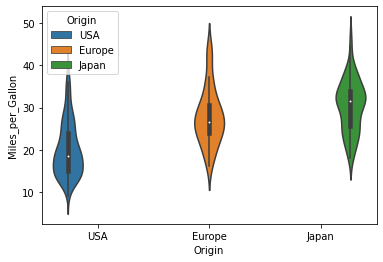

In [ ]:
sns.violinplot(
    data=df_cars,
    x='Origin',
    y='Miles_per_Gallon',
    hue="Origin",
)


### Exercise 3: Pick a distribution plot of your choice to look at the `"Displacement"` column of the dataset.

In [18]:
df_cars.head(3)

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970,USA


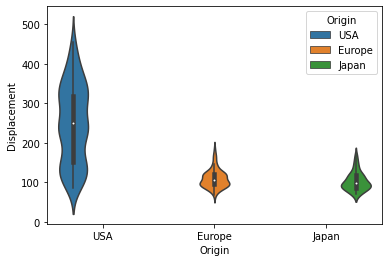

In [24]:
### TO-DO: Plot a distribution graph of the displacement of cars


sns.violinplot(
    data=df_cars,
    x='Origin',
    y='Displacement',
    hue="Origin"
)



## Relational Plots (`sns.relplot`)

Relation plots are functions that are used to show the relationship between two variables.

The `kind` paramter allows you to pick the type of plot.

* `kind="scatter"`: allows you to plot a scatter plot
* `kind="line"`: allows you to plot a line plot

There are also `row` and `col` parameters.

* `row="name of column"`
* `col="name of column"`





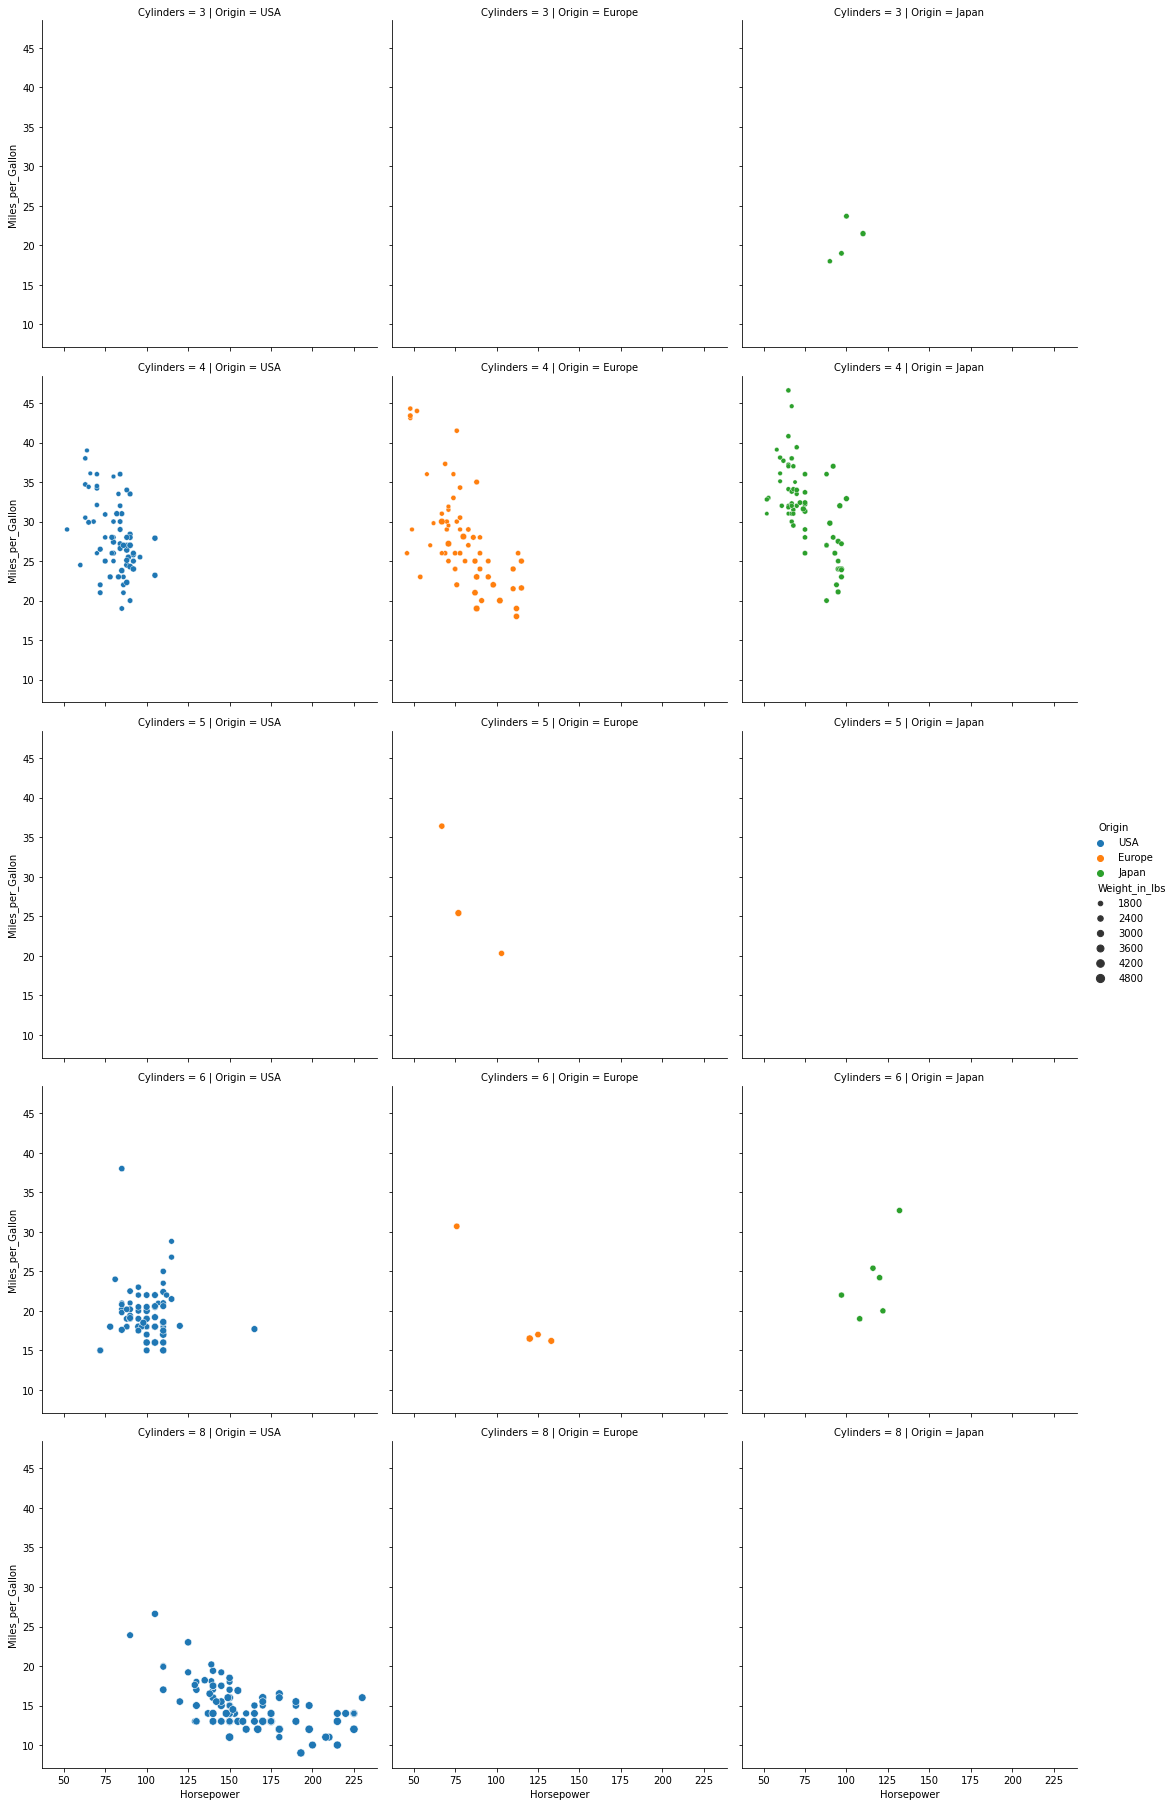

In [ ]:
sns.relplot(
    data=df_cars,
    kind="scatter",
    x='Horsepower',
    y='Miles_per_Gallon',
    hue="Origin",
    row="Cylinders",
    size="Weight_in_lbs",
    col='Origin'
)

## Categorical Plots (`sns.catplot`)


Categorial plots are functions that are used to show the relationship between two variables (specifically between a numerical and categorial varialbe).

The `kind` paramter allows you to pick the type of plot.

* Categorical scatterplots:
  * `kind="strip"`: plots a strip plot
  * `kind="line"`: plots a swarm plot

* Categorical distribution plots:
  * `kind="box"`: plots a box plot
  * `kind="violin"`: plots a violin plot
  * `kind="boxenplot"`: plots a boxen plot (an enhanced box plot for larger datasets.

* Categorical estimate plots:
 * `kind="point"`: plots a point plot
 * `kind="bar"`: plots a bar plot
 * `kind="count"`: plots a count plot

There are also `row` and `col` parameters.

* `row="name of column"`
* `col="name of column"`


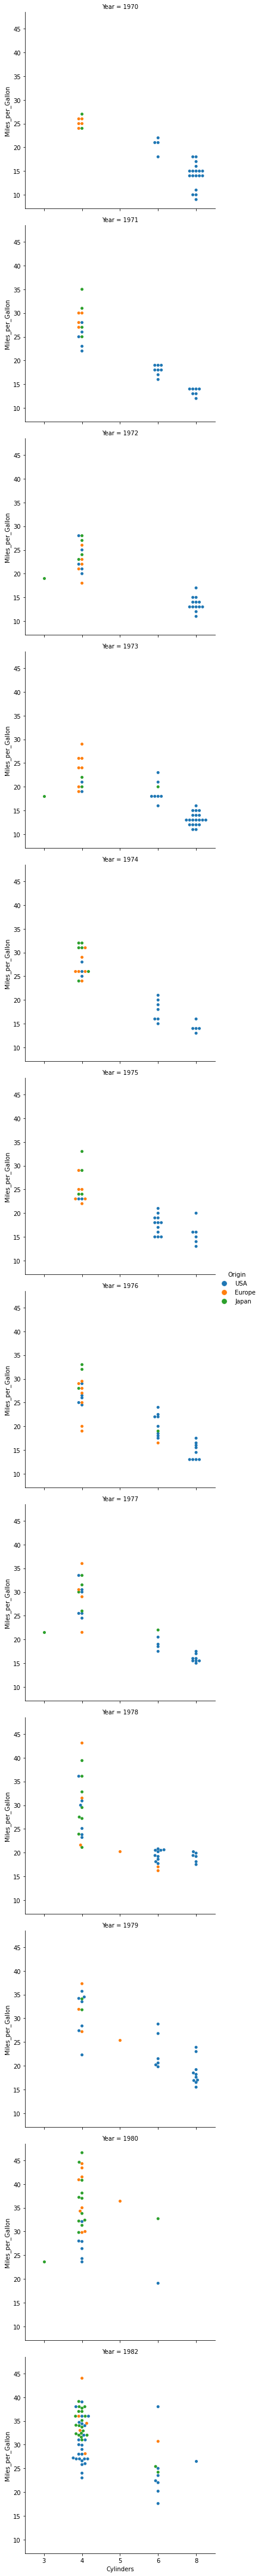

In [ ]:
### Categorical Plots

sns.catplot(
    data=df_cars,
    kind="swarm",
    x='Cylinders',
    y='Miles_per_Gallon',
    hue="Origin",
    row="Year"
)

# Peer Programming: Graphing Your Data

Use some of the plots learned today to graph your data.

In [25]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create a list of missing values and save as a variable
missing_values = ['n/a', 'na', 'NaN', 'NA', '--']

# Import dataset
characters = pd.read_csv("https://raw.githubusercontent.com/nguyenjenny/spark_shared_repo/main/datasets/characters.csv", na_values=missing_values)


# Correct error

characters = characters.replace(392.0,180.0)

characters

,Name,Height,Mass,Hair Color,Skin Color,Eye Color,Birth Year,BBY/ABY,Gender,Homeworld,Species
0,Ackbar,180.0,83.0,None,Brown Mottle,Orange,41.0,NaN,Male,Mon Cala,Mon Calamari
1,Adi Gallia,184.0,50.0,None,Dark,Blue,80.0,NaN,Female,Coruscant,Tholothian
2,Anakin Skywalker,188.0,84.0,Blond,Fair,Blue,41.9,NaN,Male,Tatooine,Human
3,Arvel Crynyd,NaN,NaN,Brown,Fair,Brown,NaN,NaN,Male,NaN,Human
4,Ayla Secura,178.0,55.0,None,Blue,Hazel,48.0,NaN,Female,Ryloth,Twi'lek
...,...,...,...,...,...,...,...,...,...,...,...
82,Wicket Systri Warrick,88.0,20.0,Brown,Brown,Brown,8.0,BBY,Male,Endor,Ewok
83,Wilhuff Tarkin,180.0,NaN,"Auburn, Grey",Fair,Blue,64.0,BBY,Male,Eriadu,Human
84,Yarael Poof,264.0,NaN,None,White,Yellow,NaN,NaN,Male,Quermia,Quermian
85,Yoda,66.0,17.0,White,Green,Brown,896.0,BBY,Male,NaN,NaN


In [38]:
characters2 = characters.set_index("Name")
characters2.loc["Darth Maul",["Homeworld","Species","Height"]]

Homeworld    Dathomir
Species        Zabrak
Height            175
Name: Darth Maul, dtype: object

In [30]:
characters['Species'].value_counts()

Human           38
Droid            6
Gungan           3
Zabrak           2
Twi'lek          2
Mirialan         2
Wookiee          2
Kaminoan         2
Xexto            1
Rodian           1
Aleena           1
Kel Dor          1
Toong            1
Nautolan         1
Geonosian        1
Trandoshan       1
Sullustan        1
Hutt             1
Pau'an           1
Neimodian        1
Clawdite         1
Togruta          1
Kaleesh          1
Muun             1
Vulptereen       1
Besalisk         1
Mon Calamari     1
Umbara           1
Skakoan          1
Ewok             1
Quermian         1
Toydarian        1
Chagrian         1
Dug              1
Cerean           1
Tholothian       1
Iktotchi         1
Name: Species, dtype: int64

Text(0.5, 1.0, 'Character Height (cm) vs Mass (kg)')

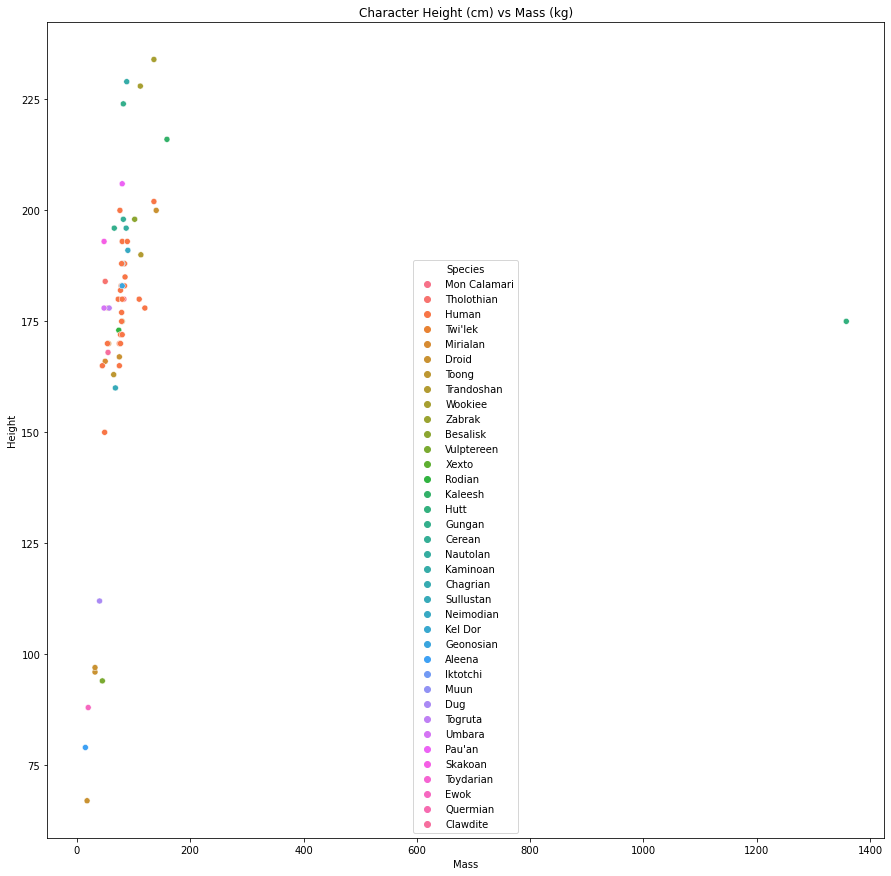

In [33]:
# Graph data

plt.figure(figsize=(15,15))
heights = sns.scatterplot(
    data=characters,
    x='Mass',
    y='Height',
    hue='Species',
    estimator=np.mean,
)

heights.set_title("Character Height (cm) vs Mass (kg)")

Text(0.5, 1.0, 'Human Height Distribution by Gender')

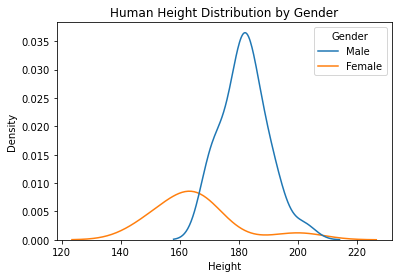

In [29]:
humans = characters[characters["Species"]=="Human"]




human_heights = sns.kdeplot(
    data=humans,
    x='Height',
    hue="Gender",
)

human_heights.set_title("Human Height Distribution by Gender")

Text(0.5, 1.0, 'Humans Born Before Battle of Yavin Height (cm) vs Mass (kg)')

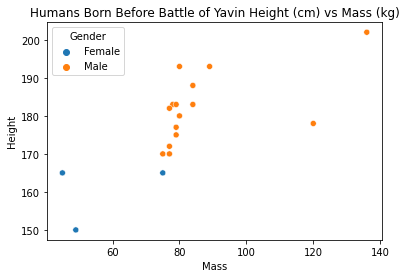

In [27]:
# separate older and younger humans

older_humans = humans[humans["BBY/ABY"]=="BBY"]

younger_humans = humans[humans["BBY/ABY"]=="ABY"]

# Graph

graph = sns.scatterplot(
    data=older_humans,
    x='Mass',
    y='Height',
    hue='Gender',
    estimator=np.mean,
)

graph.set_title("Humans Born Before Battle of Yavin Height (cm) vs Mass (kg)")


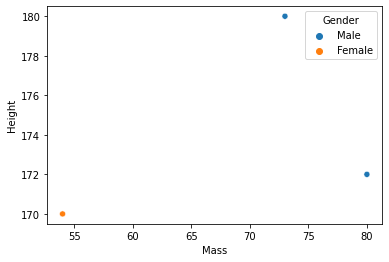

In [20]:
sns.scatterplot(
    data=younger_humans,
    x='Mass',
    y='Height',
    hue='Gender',
    estimator=np.mean,
)

# Good Documentation & Comments


<iframe width="560" height="315" src="https://www.youtube.com/embed/0NO3MJkxm2g" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [ ]:
from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/0NO3MJkxm2g" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

# Peer Programming: Comment Your Code